# Oral Insulin Phase II Clinical Trial Data Exploration
## by Michael Ehiabor

## Introduction
> This document explores three datasets with information about the phase two clinical trial of 350 patients for a new innovative oral insulin called Auralin - a proprietary capsule that can solve the stomach lining problem that has historically been the roadblock when diabetics try to ingest insulin orally

## Questions for analysis
> In this trial, half of the patients are being treated with Auralin, and the other 175 being treated with a popular injectable insulin called Novodra. By comparing key metrics between these two drugs, we can determine if Auralin is effective

## Preliminary Wrangling

In [525]:
#Import all packages and set plot to be embedded inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import t
%matplotlib inline

### Gather

In [99]:
#Load in the datasets into pandas dataframes and print statistics
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
adverse_reactions = pd.read_csv('adverse_reactions.csv')

### Assess

In [100]:
#high-level overview of the data shapes and compositions
patients

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7


In [101]:
treatments

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20
276,john,teichelmann,-,49u - 49u,7.90,7.58,NaN
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36


In [102]:
adverse_reactions

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


In [103]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [104]:
patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [105]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [106]:
patients['surname'].value_counts()

Doe            6
Jakobsen       3
Taylor         3
Ogochukwu      2
Tucker         2
              ..
Casárez        1
Mata           1
Pospíšil       1
Rukavina       1
Onyekaozulu    1
Name: surname, Length: 466, dtype: int64

In [107]:
patients['address'].value_counts()

123 Main Street             6
2778 North Avenue           2
2476 Fulton Street          2
648 Old Dear Lane           2
3094 Oral Lake Road         1
                           ..
1066 Goosetown Drive        1
4291 Patton Lane            1
4643 Reeves Street          1
174 Lost Creek Road         1
3652 Boone Crockett Lane    1
Name: address, Length: 483, dtype: int64

In [108]:
patients[patients['address'].duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [109]:
patients['weight'].sort_values()

210     48.8
459    102.1
335    102.7
74     103.2
317    106.0
       ...  
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 503, dtype: float64

In [110]:
patients[patients['weight'] == 48.8]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691.0,United States,330-202-2145CamillaZaitseva@superrito.com,11/26/1938,48.8,63,19.1


In [111]:
weight_lbs = patients[patients['surname'] == 'Zaitseva'].weight * 2.20462
height_in = patients[patients['surname'] == 'Zaitseva'].height

bmi_check = 703 * weight_lbs / height_in ** 2
print(bmi_check)

210    19.055827
dtype: float64


In [112]:
patients[patients['surname'] == 'Zaitseva'].bmi

210    19.1
Name: bmi, dtype: float64

In [113]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  171 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [114]:
sum(treatments.auralin.isnull())

0

In [115]:
sum(treatments.novodra.isnull())

0

In [116]:
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [117]:
all_columns = pd.Series(list(patients) + list(treatments) + list(adverse_reactions))
all_columns[all_columns.duplicated()]

14    given_name
15       surname
21    given_name
22       surname
dtype: object

### Quality
`patients` table:

- Zip code is float not a string
- Zip code is sometimes four digits
- Tim Neudorf height is 27in instead of 72in
- Full state name given sometimes, abbreviation other times
- Dsvid Gustafsson
- Missing demographic information (address - contact columns)
- Errorneous datatypes (assigned sex, state, zip code, birthdate)
- Multiple phone number formats
- Default John Doe data
- Multiple records for Jakobsen, Taylor, Gersten
- Kg instead of lbs for Zaitseva weight

`treatments` table:
- Missing Hba1c changes
- The letter u in the starting and ending doses for Auralin and Novodra
- Lowercase given names and surnames
- missing records (280 instead of 350)
- Errorneous datatypes (Auralin and Novodra columns)
- Inaccurate Hba1c changes (4s mistaken for 9s)
- Nulls represented as dashes (-) for auralin and novodra columns

`adverse_reactions` table:
- Lowercase given names and surnames

### Tidiness
- Contact column in `patients` table should be split into email and phone number 
- Three variables in two columns in the `treatments` table (treatment, start_dose, end_dose)
- Adverse reaction should be part of the `treatments` table
- Given name and surname in the `patients` table duplicated in the `treatments` and `adverse_reactions` tables 

## Clean

In [340]:
# Make a copy of each dataset before cleaning
patients_clean = patients.copy()
treatments_clean = treatments.copy()
adverse_reactions_clean = adverse_reactions.copy()

### Missing Data
### `treatments` :  missing records (280 instead of 350)

#### Define
import the cut treatments into a dataframe and concatenate it with the the original treatments dataframe

#### Code

In [341]:
treatments_cut = pd.read_csv('treatments_cut.csv')

In [342]:
treatments_clean = pd.concat([treatments_clean, treatments_cut], ignore_index=True)

#### Test

In [343]:
treatments_clean.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [344]:
treatments_clean.tail()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
345,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
346,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
348,berta,napolitani,-,42u - 44u,7.68,7.21,NaN
349,armina,sauvé,36u - 46u,-,7.86,7.40,NaN


### `treatments`: missing HbA1c changes and inaccurate HbA1c changes leading to 4s mistaken as 9s

#### Define
Recalculate the `hba1c_change` column: `hba1c_start` minus `hba1c_end`

#### Code

In [345]:
treatments_clean.hba1c_change = (treatments_clean.hba1c_start - treatments_clean.hba1c_end)

#### Test

In [346]:
treatments_clean.hba1c_change.head()

0    0.43
1    0.47
2    0.43
3    0.35
4    0.32
Name: hba1c_change, dtype: float64

### Tidiness

contacts in `patients` table contain two variables: email and phone number

In [347]:
patients_clean.head(1)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6


#### Define
Extract the phone number and email using regular expressions and pandas' `str.extract` method. drop the contact column when done

#### Code

In [348]:
patients_clean['phone_number'] = patients_clean.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})', expand = True)

#[a-zA-Z] to signify emails in the dataset all start and end with letters
patients_clean['email_address'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+[a-zA-Z])', expand = True)

#Drop contact column
patients_clean = patients_clean.drop('contact', axis=1)

#### Test

In [349]:
list(patients_clean)

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'birthdate',
 'weight',
 'height',
 'bmi',
 'phone_number',
 'email_address']

In [350]:
patients_clean.phone_number.sample(25)

442         516-512-4875
302         601-296-7799
191    +1 (312) 864-5737
26          309-671-8852
227         402-938-2157
210         330-202-2145
92          609-914-8473
143         206-902-0473
450         516-626-8021
428         412-319-0903
462         213-749-6958
16          559 765 7836
352         912-988-6655
31          423-538-4887
20          781 447 1763
451         909 982 4264
256         570-797-6666
233         504-546-5321
203         636-442-6946
466    +1 (612) 589-1495
237           1234567890
95          325-282-4087
447         708-691-2195
439         515 362 6574
490         914-636-9304
Name: phone_number, dtype: object

In [351]:
#Confirm that no email starts with an integer (regex did not match for this)
patients_clean.email_address.sort_values().head()

404               AaliyahRice@dayrep.com
11          Abdul-NurMummarIsa@rhyta.com
332                AbelEfrem@fleckens.hu
258              AbelYonatan@teleworm.us
305    AddolorataLombardi@jourrapide.com
Name: email_address, dtype: object

### Three variables in the two columns in the `treatments` table

#### Define
Melt the *auralin* and *novodra* column to a *treatment* and *dose* column (dose will contain both start and end dose at this point) then split dose column on '-' to obtain start_dose and end_dose columns

#### Code

In [352]:
treatments_clean

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
345,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
346,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.45
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
348,berta,napolitani,-,42u - 44u,7.68,7.21,0.47


In [353]:
treatments_clean = pd.melt(treatments_clean, id_vars= ['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                          value_vars=('auralin', 'novodra'),
                          var_name= 'treatment',
                          value_name= 'dose')

treatments_clean = treatments_clean[treatments_clean['dose'] != '-']
treatments_clean['dose_start'], treatments_clean['dose_end'] = treatments_clean.dose.str.split(' - ', 1).str

treatments_clean = treatments_clean.drop('dose', axis=1)

/var/folders/k7/z1dxqhd52djfz2k9dtkfqb8c0000gn/T/ipykernel_65040/2598738159.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  treatments_clean['dose_start'], treatments_clean['dose_end'] = treatments_clean.dose.str.split(' - ', 1).str


#### Test

In [354]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u


### Adverse reaction should be part of the `treatment` table 

#### Define
Merge the adverse reaction column to the treatment table joining on given name and surname

#### Code

In [355]:
treatments_clean = pd.merge(treatments_clean, adverse_reactions_clean,
                           on=['given_name', 'surname'],
                           how = 'left')

#### Test

In [356]:
treatments_clean.head(10)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u,NaN
3,eddie,archer,7.89,7.55,0.34,auralin,31u,38u,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u,NaN
5,joseph,day,7.70,7.19,0.51,auralin,29u,36u,hypoglycemia
6,roxanne,andreyeva,9.54,9.14,0.40,auralin,29u,38u,NaN
7,simone,baumgaertner,7.74,7.30,0.44,auralin,27u,37u,NaN
8,enco,žibrik,7.78,7.34,0.44,auralin,55u,68u,NaN
9,camilla,zaitseva,7.53,7.13,0.40,auralin,28u,37u,NaN


### Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables

#### Define
Adverse reaction table is no longer needed so ignore that part. Isolate the patient_id and names in the `patients` table then convert these names to lower case to join with the `treatments` table. Then drop the given name and surname in the `treatments` table (so these being lower case isn't an issue anymore)

#### Code

In [357]:
id_names = patients_clean[['patient_id', 'given_name','surname']]
id_names.given_name = id_names.given_name.str.lower()
id_names.surname = id_names.surname.str.lower()
treatments_clean = pd.merge(treatments_clean, id_names,
                           on=['given_name', 'surname'])

treatments_clean = treatments_clean.drop(['given_name', 'surname'], axis = 1)

/var/folders/k7/z1dxqhd52djfz2k9dtkfqb8c0000gn/T/ipykernel_65040/110782749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_names.given_name = id_names.given_name.str.lower()
/var/folders/k7/z1dxqhd52djfz2k9dtkfqb8c0000gn/T/ipykernel_65040/110782749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_names.surname = id_names.surname.str.lower()


#### Test

In [358]:
#Confirm the merge was executed correctly
treatments_clean

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41u,48u,NaN,225
1,7.97,7.62,0.35,auralin,33u,36u,NaN,242
2,7.65,7.27,0.38,auralin,37u,42u,NaN,345
3,7.89,7.55,0.34,auralin,31u,38u,NaN,276
4,7.76,7.37,0.39,auralin,30u,36u,NaN,15
...,...,...,...,...,...,...,...,...
344,7.51,7.06,0.45,novodra,55u,51u,nausea,153
345,7.67,7.30,0.37,novodra,26u,23u,NaN,420
346,9.21,8.80,0.41,novodra,22u,23u,injection site discomfort,336
347,7.96,7.51,0.45,novodra,28u,26u,hypoglycemia,25


In [359]:
# Patient ID should be the only duplicated column
all_columns = pd.Series(list(patients_clean) + list(treatments_clean))
all_columns[all_columns.duplicated()]

22    patient_id
dtype: object

### Quality

### Zipcode is a float not a string and zipcode has four digits sometimes

#### Define
Convert zipcode's column datatype from float to string using `astype`, remove the .0 using string slicing and pad four digit codes with a leading 0

#### Code

In [360]:
patients_clean.zip_code = patients_clean.zip_code.astype(str).str[:-2].str.pad(5, fillchar='0', side='left')
#Remove the Nan entries that were converted to 0000n by the code above 
patients_clean.zip_code = patients_clean.zip_code.replace('0000n', np.nan)

#### Test

In [361]:
patients_clean.zip_code.head()

0    92390
1    61812
2    68467
3    07095
4    36303
Name: zip_code, dtype: object

### Tim Neudorf height is 27in instead of 72in

#### Define
Replace the height in the `patients` table that have a height of 27in (there is only one) with 72in

#### Code

In [362]:
patients_clean.height = patients_clean.height.replace(27, 72)

#### Test

In [363]:
#Should be empty
patients_clean[patients_clean['height'] == 27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email_address


In [364]:
#Confirm the replacement worked 
patients_clean[patients_clean['surname'] == 'Neudorf']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email_address
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,72,26.1,334-515-7487,TimNeudorf@cuvox.de


### Full name state sometimes, abbreviation other times

In [365]:
patients_clean.state.sort_values()

98      AK
13      AL
281     AL
309     AL
4       AL
      ... 
264    NaN
269    NaN
278    NaN
286    NaN
296    NaN
Name: state, Length: 503, dtype: object

#### Define
Apply a function that converts full state name to state abbreviation for California, New York, Illinois, Florida, Nebraska

#### Code

In [366]:
#Mapping from the full state name to abbreviation

state_abbrev = {'California': 'CA',
                'New York': 'NY',
                'Illinois': 'IL',
                'Florida': 'FL',
                'Nebraska': 'NE'}

def abbreviate_state(patient):
    if patient['state'] in state_abbrev.keys():
        abbrev = state_abbrev[patient['state']]
        return abbrev
    else:
        return patient['state']
    
patients_clean['state'] = patients_clean.apply(abbreviate_state, axis =1)

#### Test

In [367]:
patients_clean.state.value_counts()

CA    60
NY    47
TX    32
IL    24
FL    22
MA    22
PA    18
GA    15
OH    14
MI    13
OK    13
LA    13
NJ    12
VA    11
WI    10
MS    10
AL     9
TN     9
IN     9
MN     9
NC     8
KY     8
WA     8
MO     7
NE     6
KS     6
ID     6
NV     6
SC     5
IA     5
CT     5
RI     4
ND     4
AR     4
AZ     4
ME     4
CO     4
MD     3
DE     3
SD     3
WV     3
OR     3
VT     2
MT     2
DC     2
AK     1
NM     1
NH     1
WY     1
Name: state, dtype: int64

### Dsvid Gustafsson 

#### Define
Replace the given name for rows in the `patients` table that have the given name **Dsvid** with **David**

#### Code

In [368]:
patients_clean.given_name = patients_clean.given_name.replace('Dsvid', 'David')

#### Test

In [369]:
patients_clean[patients_clean['surname'] == 'Gustafsson']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email_address
8,9,male,David,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,3/6/1937,163.9,66,26.5,816-265-9578,DavidGustafsson@armyspy.com


### Errorneous datatypes (assigned sex, state, zip code, birthdate) and Errorneous datatypes (Auralin and Novodra columns) and the letter 'u' in the start and end doses for Auralin and Novodra

#### Define
`patients` table: Convert assigned sex and state to categorical datatype, zip code was already addressed above, covert birthdate to datetime datatype. `treatments` table: Strip the letter 'u' in the start and end doses and convert the datatypes in both columns to integer

#### Code

In [370]:
#To Category
patients_clean.assigned_sex = patients_clean.assigned_sex.astype('category')
patients_clean.state = patients_clean.state.astype('category')

#To datatime
patients_clean.birthdate = pd.to_datetime(patients_clean['birthdate'])

#Strip 'u' and convert to integer
treatments_clean.dose_end = treatments_clean.dose_end.str.strip('u').astype(int)
treatments_clean.dose_start = treatments_clean.dose_start.str.strip('u').astype(int)

#### Test

In [371]:
patients_clean.head(3)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email_address
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,1976-07-10,121.7,66,19.6,951-719-9170,ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812,United States,1967-04-03,118.8,66,19.2,+1 (217) 569-3204,PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467,United States,1980-02-19,177.8,71,24.8,402-363-6804,JaeMDebord@gustr.com


In [372]:
patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   patient_id     503 non-null    int64         
 1   assigned_sex   503 non-null    category      
 2   given_name     503 non-null    object        
 3   surname        503 non-null    object        
 4   address        491 non-null    object        
 5   city           491 non-null    object        
 6   state          491 non-null    category      
 7   zip_code       491 non-null    object        
 8   country        491 non-null    object        
 9   birthdate      503 non-null    datetime64[ns]
 10  weight         503 non-null    float64       
 11  height         503 non-null    int64         
 12  bmi            503 non-null    float64       
 13  phone_number   491 non-null    object        
 14  email_address  491 non-null    object        
dtypes: category(2), datetim

In [373]:
treatments_clean.head(3)

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41,48,NaN,225
1,7.97,7.62,0.35,auralin,33,36,NaN,242
2,7.65,7.27,0.38,auralin,37,42,NaN,345


In [374]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hba1c_start       349 non-null    float64
 1   hba1c_end         349 non-null    float64
 2   hba1c_change      349 non-null    float64
 3   treatment         349 non-null    object 
 4   dose_start        349 non-null    int64  
 5   dose_end          349 non-null    int64  
 6   adverse_reaction  35 non-null     object 
 7   patient_id        349 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 24.5+ KB


### Multiple phone number formats

#### Define
Strip all "","-","(", ")" and "+" and store each number without any formatting. Pad the phone number with 1 if the length of the phone number is 10 digits (we want country code)

#### Code

In [375]:
patients_clean.phone_number = patients_clean.phone_number.str.replace(r'\D+', '').str.pad(11, fillchar= '1', side = 'left')

/var/folders/k7/z1dxqhd52djfz2k9dtkfqb8c0000gn/T/ipykernel_65040/2439665050.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  patients_clean.phone_number = patients_clean.phone_number.str.replace(r'\D+', '').str.pad(11, fillchar= '1', side = 'left')


#### Test

In [376]:
patients_clean.phone_number.head()

0    19517199170
1    12175693204
2    14023636804
3    17326368246
4    13345157487
Name: phone_number, dtype: object

### Default John Doe Data

#### Define
Remove all non-recoverable john doe data from the `patients` table 

#### Code

In [377]:
patients_clean = patients_clean[patients_clean['surname'] != 'Doe']

#### Test

In [378]:
#Should be no more Doe records
patients_clean.surname.value_counts()

Jakobsen       3
Taylor         3
Aranda         2
Tucker         2
Souza          2
              ..
Casárez        1
Mata           1
Pospíšil       1
Rukavina       1
Onyekaozulu    1
Name: surname, Length: 465, dtype: int64

In [379]:
#Should be no more 123 Main street records
patients_clean.address.value_counts()

2778 North Avenue           2
2476 Fulton Street          2
648 Old Dear Lane           2
576 Brown Bear Drive        1
2272 Williams Avenue        1
                           ..
1066 Goosetown Drive        1
4291 Patton Lane            1
4643 Reeves Street          1
174 Lost Creek Road         1
3652 Boone Crockett Lane    1
Name: address, Length: 482, dtype: int64

### Multiple records for Jakobsen, Gersten and Taylor

#### Define
Remove Jake Jakobsen, Pat Gersten and Sandy Taylor records from the `patients` table. These are nicknames which happen to also not be in the `treatments` table. Removing the wrong name would cause a consistency issue between the `patients` and `treatments` tables. These are all second occurences of the duplicates. They are also the only occurences of not null duplicates

#### Code

In [409]:
# Tilde '~' means no
patients_clean = patients_clean[~((patients_clean.address.duplicated()) & patients_clean.address.notnull())]

#### Test

In [410]:
patients_clean[patients_clean['surname'] == 'Jakobsen']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email_address
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,1962-11-25,185.2,67,29.0,19792030438,KarenJakobsen@jourrapide.com


In [411]:
patients_clean[patients_clean['surname'] == 'Gersten']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email_address
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com


In [412]:
patients_clean[patients_clean['surname'] == 'Taylor']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email_address
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,1992-09-02,186.6,69,27.6,13054346299,RogelioJTaylor@teleworm.us


#### Kg instead of lbs for Zaitseva weight

#### Define
Use advanced indexing to isolate the row where the surname is Zaitseva and convert the entry in the weights field from kg to lbs

#### Code

In [424]:
weight_kg = patients_clean['weight'].min()
mask = patients_clean.surname=='Zaitseva'
column_name = 'weight'
patients_clean.loc[mask, column_name] = weight_kg * 2.20462

#### Test

In [426]:
#48.8 shouldn't be the lowest weight anymore
patients_clean.weight.sort_values()

459    102.1
335    102.7
74     103.2
317    106.0
171    106.5
       ...  
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 494, dtype: float64

In [427]:
treatments_clean

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41,48,NaN,225
1,7.97,7.62,0.35,auralin,33,36,NaN,242
2,7.65,7.27,0.38,auralin,37,42,NaN,345
3,7.89,7.55,0.34,auralin,31,38,NaN,276
4,7.76,7.37,0.39,auralin,30,36,NaN,15
...,...,...,...,...,...,...,...,...
344,7.51,7.06,0.45,novodra,55,51,nausea,153
345,7.67,7.30,0.37,novodra,26,23,NaN,420
346,9.21,8.80,0.41,novodra,22,23,injection site discomfort,336
347,7.96,7.51,0.45,novodra,28,26,hypoglycemia,25


In [433]:
treatments_clean['dose_change'] = treatments_clean['dose_end'] - treatments_clean['dose_start']

In [442]:
treatments_clean

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id,dose_change
0,7.63,7.20,0.43,auralin,41,48,NaN,225,7
1,7.97,7.62,0.35,auralin,33,36,NaN,242,3
2,7.65,7.27,0.38,auralin,37,42,NaN,345,5
3,7.89,7.55,0.34,auralin,31,38,NaN,276,7
4,7.76,7.37,0.39,auralin,30,36,NaN,15,6
...,...,...,...,...,...,...,...,...,...
344,7.51,7.06,0.45,novodra,55,51,nausea,153,-4
345,7.67,7.30,0.37,novodra,26,23,NaN,420,-3
346,9.21,8.80,0.41,novodra,22,23,injection site discomfort,336,1
347,7.96,7.51,0.45,novodra,28,26,hypoglycemia,25,-2


# Analysis & Visualization

## Auralin vs. Novodra: Clinical Trail Key Metrics
Is Auralin the propsed new oral insulin effective?

### Adverse Reactions

In [458]:
# Get the number of adverse reactions for both treatment types
adverse_reaction = treatments_clean.groupby('treatment')['adverse_reaction'].value_counts()
adverse_reaction = adverse_reaction.reset_index(name = 'count')

adverse_reaction

,treatment,adverse_reaction,count
0,auralin,hypoglycemia,10
1,auralin,throat irritation,2
2,auralin,cough,1
3,auralin,headache,1
4,auralin,nausea,1
5,novodra,hypoglycemia,10
6,novodra,injection site discomfort,6
7,novodra,headache,2
8,novodra,cough,1
9,novodra,nausea,1


- For Auralin to pass this phase two clinical trial it must be deemed safe and the adverse reactions data is encouraging

In [461]:
auralin_reactions = adverse_reaction[adverse_reaction['treatment'] == 'auralin']
novodra_reactions = adverse_reaction[adverse_reaction['treatment'] == 'novodra']

Text(0.5, 1.0, 'Adverse Reaction Counts for Novodra')

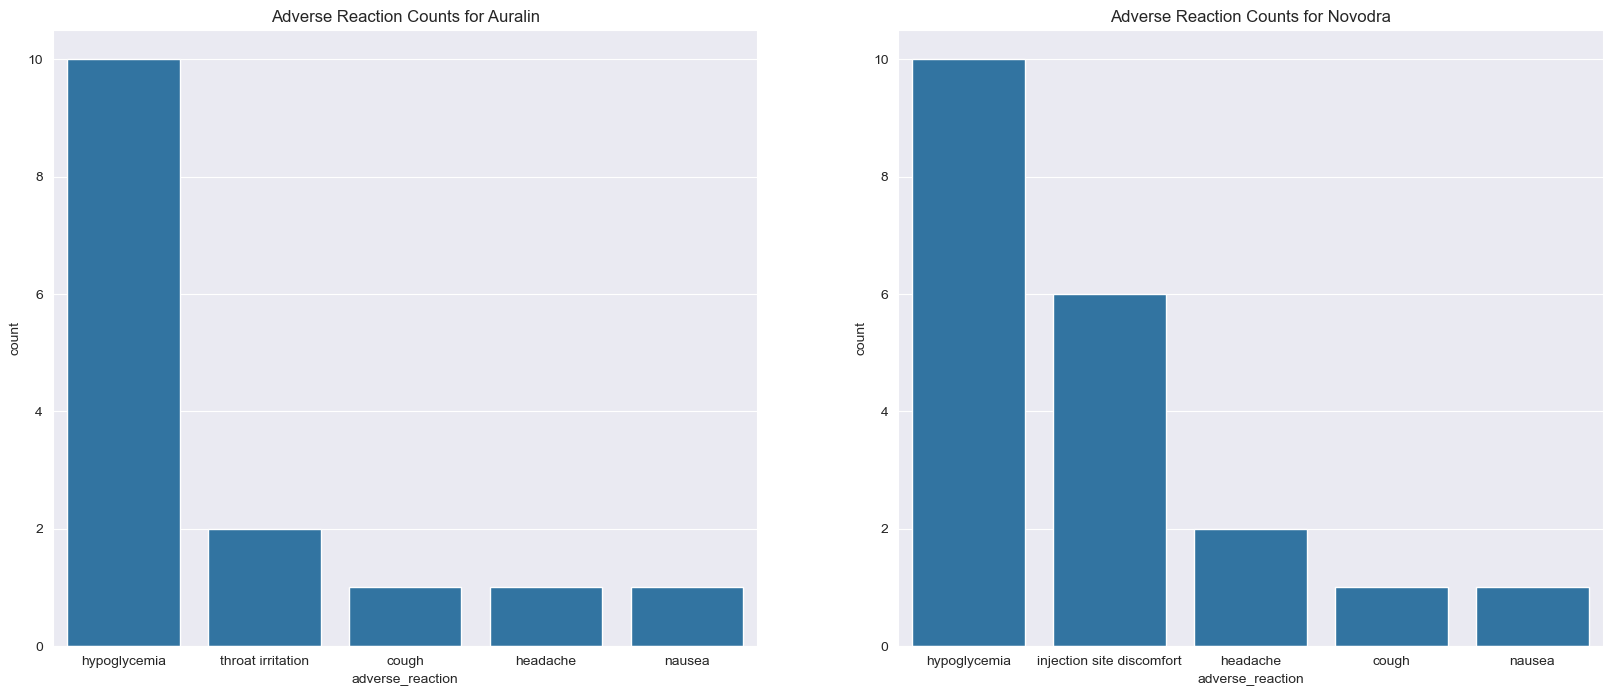

In [563]:
#Plot bar charts showing the count of adverse reactions for each treatment method
plt.figure(figsize=[20, 8])

base_color = sb.color_palette()[0]
plt.subplot(1,2,1)
sb.barplot(data = auralin_reactions, x = 'adverse_reaction', y = 'count', color = base_color)
plt.title('Adverse Reaction Counts for Auralin')
sb.set_style("darkgrid")

plt.subplot(1,2,2)
sb.barplot(data = novodra_reactions, x = 'adverse_reaction', y = 'count', color = base_color)
plt.title('Adverse Reaction Counts for Novodra')


- Some common adverse reactions are cough, headache, nausea and hypoglycemia(which is low blood sugar caused by an insulin overdose).


- Between the two drugs Auralin and Novodra the pure counts of each adverse reaction are pretty similar with the exception of throat irritation for Auralin(the oral insulin) which can be expected because this pill is taken orally and passes by the throat before it gets to the stomach and injection site discomfort for Novodra which is the injectable insulin and that is to be expected because that's a common known adverse reaction for injectable insulin because of needles

## Pre-trial/Post-trial Mean Insulin Dose Change (IU)
This is really important because if the new oral insulin requires a way higher dosage to be effective, it would be challanging for the manufacturer to bring it to market. Requiring Massive doses makes things finanacially infeasible and essentially and economic problem for the manufacturer

*Note: Insulin is measured in international units of insulin (e.g 1IU or 1u).*

In [489]:
# Calculate the dose_chage column: dose_start - dose_end
treatments_clean['dose_change'] = treatments_clean['dose_start'] - treatments_clean['dose_end']
treatments_clean.head()

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id,dose_change
0,7.63,7.20,0.43,auralin,41,48,NaN,225,-7
1,7.97,7.62,0.35,auralin,33,36,NaN,242,-3
2,7.65,7.27,0.38,auralin,37,42,NaN,345,-5
3,7.89,7.55,0.34,auralin,31,38,NaN,276,-7
4,7.76,7.37,0.39,auralin,30,36,NaN,15,-6


In [493]:
mean_dose_change = treatments_clean.groupby('treatment')['dose_change'].mean()
mean_dose_change = mean_dose_change.reset_index(name = 'avg_dose_change')
mean_dose_change

,treatment,avg_dose_change
0,auralin,-8.325714
1,novodra,0.385057


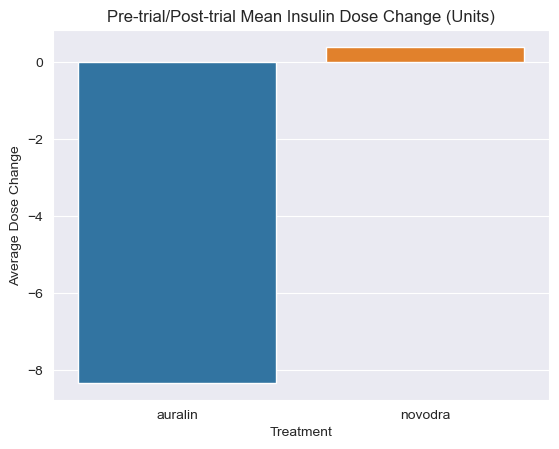

In [506]:
#Plot a bar chart showing the mean dose change by treatment method
sb.barplot(data = mean_dose_change, x = 'treatment', y = 'avg_dose_change')
sb.set_style("darkgrid")
plt.title('Pre-trial/Post-trial Mean Insulin Dose Change (Units)')
plt.xlabel('Treatment')
plt.ylabel('Average Dose Change')
plt.show()

- Patients that were treated with Auralin on average required 8 more units of insulin to establish a safe, steady blood sugar level. That compared to novodra patients who on average require .4 units less of insulin comparing their start dose and end dose pre-trial and post-trial.


- The fact that Auralin required 8 more units is not terrible. it is to be expected because we knew that oral insulin had a tougher time getting to the blood stream through the stomach lining and 8 units more is not a cause for concern

## Pre-trial/Post-trial Mean Hba1c change 
**HbA1c is our key indicator for diabetes control most of the patients in this trail are starting around 7.9% and if it can be established that Auralin causes a reduction in HbA1c that is similar to the current injectable insulin standard, that is a success.**

*Note: HbA1c levels are measured in % (e.g 7.0%)*

In [535]:
# Calculate the mean HbA1c changes for Auralin and Novodra
mean_hba1c_changes = treatments_clean.groupby('treatment')['hba1c_change'].mean()
mean_hba1c_changes = mean_hba1c_changes.reset_index(name = 'mean_hba1c_change')
mean_hba1c_changes

,treatment,mean_hba1c_change
0,auralin,0.387657
1,novodra,0.404713


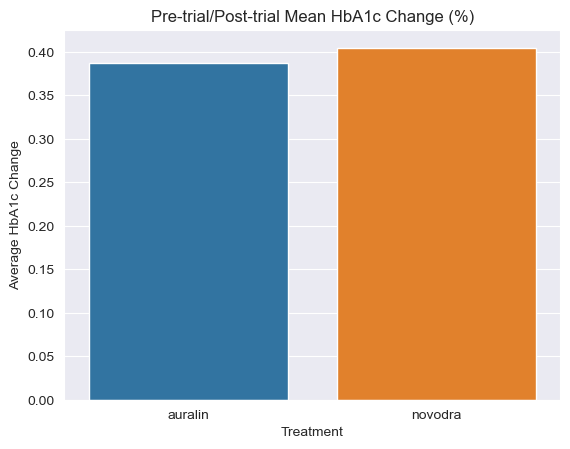

,treatment,mean_hba1c_change
0,auralin,0.387657
1,novodra,0.404713


In [514]:
#Plot a bar chart showing the mean hba1c change by treatment method
sb.barplot(data = mean_hba1c_changes, x = 'treatment', y = 'mean_hba1c_change')
sb.set_style("darkgrid")
plt.title('Pre-trial/Post-trial Mean HbA1c Change (%)')
plt.xlabel('Treatment')
plt.ylabel('Average HbA1c Change')
plt.show()
mean_hba1c_changes

In [545]:
conflevel = 0.95

In [546]:
alpha = 1 - conflevel

In [552]:
hba1c_field = tre

,treatment,mean_hba1c_change
0,auralin,0.387657
1,novodra,0.404713


In [593]:
mean_auralin = mean_hba1c_changes['mean_hba1c_change'][0]
mean_novodra = mean_hba1c_changes['mean_hba1c_change'][1]

In [618]:
diff_mean = mean_novodra - mean_auralin
diff_mean

0.017055500821018144

## Conclusion

- Between the two drugs Auralin and Novodra the pure counts of each adverse reaction are pretty similar with the exception of throat irritation for Auralin(the oral insulin) which can be expected because this pill is taken orally and passes by the throat before it gets to the stomach and injection site discomfort for Novodra which is the injectable insulin and that is to be expected because that's a common known adverse reaction for injectable insulin because of needles


- Patients that were treated with Auralin on average required 8 more units of insulin to establish a safe, steady blood sugar level. That compared to novodra patients who on average require .4 units less of insulin comparing their start dose and end dose pre-trial and post-trial.


- The difference in average Hba1c change for Auralin and Novodra post trail is 0.017. This shows that Auralin is almost as effective as Novodra and we can proceed to Phase 3 of the clinical trail